# Classification with Feature Selection

In [1]:
# 3 λεπτά

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

data2 = pd.read_csv("/home/apostolis/Επιφάνεια εργασίας/εργασία εξαμήνου (μηχανική μάθηση)/datasets/OnlineNewsPopularity_Classification FS.txt")
X2 = data2.iloc[:,0:22]
y2 = data2.iloc[:,22]
initRows = np.shape(data2)[0]
print("Initial dataset dimensions: " + str(np.shape(data2)))

Initial dataset dimensions: (39130, 23)


<br><br>
## Training with best features

In [3]:
train, test = train_test_split(data2, test_size=0.2, random_state=42)
x_train = train.iloc[:,0:22]
y_train = train.iloc[:,22]
x_test = test.iloc[:,0:22]
y_test = test.iloc[:,22]

x_train = x_train.reset_index()
y_train = y_train.reset_index()
x_test = x_test.reset_index()
y_test = y_test.reset_index()

x_train = x_train.drop('index', axis=1)
y_train = y_train.drop('index', axis=1)
x_test = x_test.drop('index', axis=1)
y_test = y_test.drop('index', axis=1)

<br><br>**Zero R**

In [4]:
lenPop = 0
lenUnpop = 0
for i in range(np.shape(y_test)[0]):
    if y_test['Label'][i] == 1:
        lenPop = lenPop + 1
    else:
        lenUnpop = lenUnpop + 1

if lenPop >= lenUnpop:
    print("Zero R accuracy: ", 100*lenPop/np.shape(y_test)[0], " %")
else:
    print("Zero R accuracy: ", 100*lenUnpop/np.shape(y_test)[0], " %")

Zero R accuracy:  52.63225146946077  %


<br><br>**Logistic Regression**

In [5]:
LogReg = LogisticRegression(dual=True).fit(x_train, y_train)
y_pred = LogReg.predict(x_test)

/home/apostolis/anaconda3/envs/my1/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/apostolis/anaconda3/envs/my1/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

         0.0       0.62      0.54      0.58      3707
         1.0       0.63      0.70      0.66      4119

   micro avg       0.63      0.63      0.63      7826
   macro avg       0.63      0.62      0.62      7826
weighted avg       0.63      0.63      0.62      7826


 [[2017 1690]
 [1226 2893]] 

Accuracy:  0.6273958599539995

Cross Validation


/home/apostolis/anaconda3/envs/my1/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/apostolis/anaconda3/envs/my1/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/apostolis/anaconda3/envs/my1/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


61.587098435184814


/home/apostolis/anaconda3/envs/my1/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/apostolis/anaconda3/envs/my1/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/apostolis/anaconda3/envs/my1/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/apostolis/anaconda3/envs/my1/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/apostolis/anaconda3/envs/my1/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:

60.57245080500895


/home/apostolis/anaconda3/envs/my1/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/apostolis/anaconda3/envs/my1/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/apostolis/anaconda3/envs/my1/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/apostolis/anaconda3/envs/my1/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/apostolis/anaconda3/envs/my1/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:

61.61257347303859


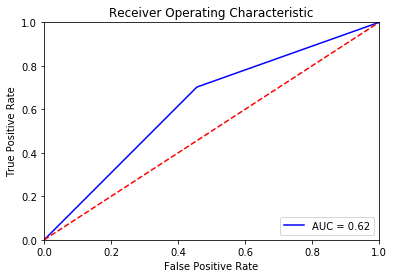

In [6]:
print(classification_report(y_test, y_pred))
print("\n", confusion_matrix(y_test, y_pred), "\n")
print("Accuracy: ", accuracy_score(y_test, y_pred))

print("\nCross Validation")
print(100*np.mean(cross_val_score(LogReg, X2, y2, cv=3)))
print(100*np.mean(cross_val_score(LogReg, X2, y2, cv=5)))
print(100*np.mean(cross_val_score(LogReg, X2, y2, cv=10)))

fpr, tpr, threshold = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig("Logistic Regression best.png")
plt.show()

<br><br>**Naive Bayes**

In [7]:
naive = BernoulliNB(fit_prior=False).fit(x_train, y_train)
y_pred = naive.predict(x_test)

/home/apostolis/anaconda3/envs/my1/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

         0.0       0.58      0.62      0.60      3707
         1.0       0.64      0.60      0.62      4119

   micro avg       0.61      0.61      0.61      7826
   macro avg       0.61      0.61      0.61      7826
weighted avg       0.61      0.61      0.61      7826


 [[2286 1421]
 [1631 2488]] 

Accuracy:  0.6100178890876565

Cross Validation
60.85870371654334
60.79223102478917
60.87145412726807


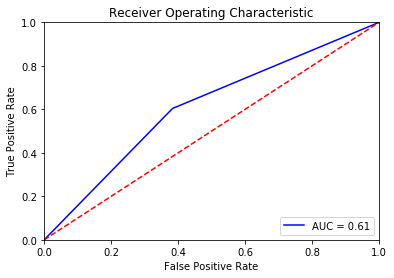

In [8]:
print(classification_report(y_test, y_pred))
print("\n", confusion_matrix(y_test, y_pred), "\n")
print("Accuracy: ", accuracy_score(y_test, y_pred))

print("\nCross Validation")
print(100*np.mean(cross_val_score(naive, X2, y2, cv=3)))
print(100*np.mean(cross_val_score(naive, X2, y2, cv=5)))
print(100*np.mean(cross_val_score(naive, X2, y2, cv=10)))

fpr, tpr, threshold = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig("Naive Bayes best.png")
plt.show()

<br><br>**K Nearest Neighbours**

In [9]:
# k=3
knn3 = KNeighborsClassifier(n_neighbors=3, weights="distance").fit(x_train, y_train)
y_pred3 = knn3.predict(x_test)

# k=5
knn5 = KNeighborsClassifier(n_neighbors=5, weights="distance").fit(x_train, y_train)
y_pred5 = knn5.predict(x_test)

# k=7
knn7 = KNeighborsClassifier(n_neighbors=7, weights="distance").fit(x_train, y_train)
y_pred7 = knn7.predict(x_test)

# k=15
knn15 = KNeighborsClassifier(n_neighbors=15, weights="distance").fit(x_train, y_train)
y_pred15 = knn15.predict(x_test)

# k=30
knn30 = KNeighborsClassifier(n_neighbors=30, weights="distance").fit(x_train, y_train)
y_pred30 = knn30.predict(x_test)

/home/apostolis/anaconda3/envs/my1/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/home/apostolis/anaconda3/envs/my1/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/home/apostolis/anaconda3/envs/my1/lib/python3.7/site-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
/home/apostolis/anaconda3/envs/my1/lib/python3.7/site-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_s

In [10]:
print("3 nearest neighbours")
print(classification_report(y_test, y_pred3))
print("\n", confusion_matrix(y_test, y_pred3), "\n")
print("Accuracy: ", accuracy_score(y_test, y_pred3))
print("\n")

print("5 nearest neighbours")
print(classification_report(y_test, y_pred5))
print("\n", confusion_matrix(y_test, y_pred5), "\n")
print("Accuracy: ", accuracy_score(y_test, y_pred5))
print("\n")

print("7 nearest neighbours")
print(classification_report(y_test, y_pred7))
print("\n", confusion_matrix(y_test, y_pred7), "\n")
print("Accuracy: ", accuracy_score(y_test, y_pred7))
print("\n")

print("15 nearest neighbours")
print(classification_report(y_test, y_pred15))
print("\n", confusion_matrix(y_test, y_pred15), "\n")
print("Accuracy: ", accuracy_score(y_test, y_pred15))
print("\n")

print("30 nearest neighbours")
print(classification_report(y_test, y_pred30))
print("\n", confusion_matrix(y_test, y_pred30), "\n")
print("Accuracy: ", accuracy_score(y_test, y_pred30))

## μόνο στο καλύτερο
print("\nCross Validation")
print(100*np.mean(cross_val_score(knn30, X2, y2, cv=3)))
print(100*np.mean(cross_val_score(knn30, X2, y2, cv=5)))
print(100*np.mean(cross_val_score(knn30, X2, y2, cv=10)))

3 nearest neighbours
              precision    recall  f1-score   support

         0.0       0.56      0.56      0.56      3707
         1.0       0.60      0.61      0.61      4119

   micro avg       0.58      0.58      0.58      7826
   macro avg       0.58      0.58      0.58      7826
weighted avg       0.58      0.58      0.58      7826


 [[2064 1643]
 [1605 2514]] 

Accuracy:  0.5849731663685152


5 nearest neighbours
              precision    recall  f1-score   support

         0.0       0.57      0.57      0.57      3707
         1.0       0.62      0.62      0.62      4119

   micro avg       0.60      0.60      0.60      7826
   macro avg       0.59      0.59      0.59      7826
weighted avg       0.60      0.60      0.60      7826


 [[2127 1580]
 [1584 2535]] 

Accuracy:  0.5957066189624329


7 nearest neighbours
              precision    recall  f1-score   support

         0.0       0.58      0.58      0.58      3707
         1.0       0.62      0.63      0.63     

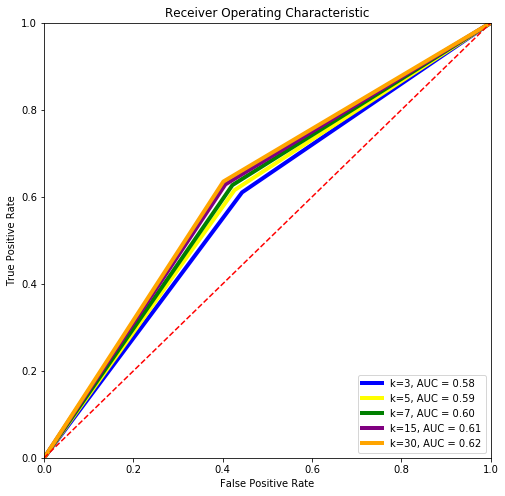

In [11]:
fpr3, tpr3, threshold3 = roc_curve(y_test, y_pred3)
fpr5, tpr5, threshold5 = roc_curve(y_test, y_pred5)
fpr7, tpr7, threshold7 = roc_curve(y_test, y_pred7)
fpr15, tpr15, threshold15 = roc_curve(y_test, y_pred15)
fpr30, tpr30, threshold30 = roc_curve(y_test, y_pred30)
roc_auc3 = auc(fpr3, tpr3)
roc_auc5 = auc(fpr5, tpr5)
roc_auc7 = auc(fpr7, tpr7)
roc_auc15 = auc(fpr15, tpr15)
roc_auc30 = auc(fpr30, tpr30)

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 8,8
plt.title('Receiver Operating Characteristic')
plt.plot(fpr3, tpr3, color='blue', linewidth=4, label = 'k=3, AUC = %0.2f' % roc_auc3)
plt.plot(fpr5, tpr5, color='yellow', linewidth=4, label = 'k=5, AUC = %0.2f' % roc_auc5)
plt.plot(fpr7, tpr7, color='green', linewidth=4, label = 'k=7, AUC = %0.2f' % roc_auc7)
plt.plot(fpr15, tpr15, color='purple', linewidth=4, label = 'k=15, AUC = %0.2f' % roc_auc15)
plt.plot(fpr30, tpr30, color='orange', linewidth=4, label = 'k=30, AUC = %0.2f' % roc_auc30)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig("K Nearest Neighbours best.png")
plt.show()

<br><br>**Random Forest**

In [12]:
## τρέχω Random Forest για διάφορα κλαδέματα
#RanFor = RandomForestClassifier(criterion="entropy").fit(x_train, y_train)
#y_pred = RanFor.predict(x_test)

#RanFor = RandomForestClassifier(criterion="entropy", max_depth=10000).fit(x_train, y_train)
#y_pred2 = RanFor.predict(x_test)

#RanFor = RandomForestClassifier(criterion="entropy", max_depth=90000).fit(x_train, y_train)
#y_pred3 = RanFor.predict(x_test)

#RanFor = RandomForestClassifier(criterion="entropy", max_depth=80000).fit(x_train, y_train)
#y_pred4 = RanFor.predict(x_test)

In [13]:
#print(classification_report(y_test, y_pred))
#print("Accuracy: ", accuracy_score(y_test, y_pred))

#print(classification_report(y_test, y_pred2))
#print("Accuracy: ", accuracy_score(y_test, y_pred2))

#print(classification_report(y_test, y_pred3))
#print("Accuracy: ", accuracy_score(y_test, y_pred3))

#print(classification_report(y_test, y_pred4))
#print("Accuracy: ", accuracy_score(y_test, y_pred4))

<br><br>
## Αποτελέσματα
<br><br>
**Results with best features**<br>
    &emsp;**Logistic Regression**<br>
        &emsp;&emsp;Accuracy = 62.73 %<br>
    &emsp;**Naive Bayes**<br>
        &emsp;&emsp;Accuracy = 61 %<br>
    &emsp;**K Nearest Neighbours**<br>
        &emsp;&emsp;Accuracy = 61.79 %<br>
<br><br>